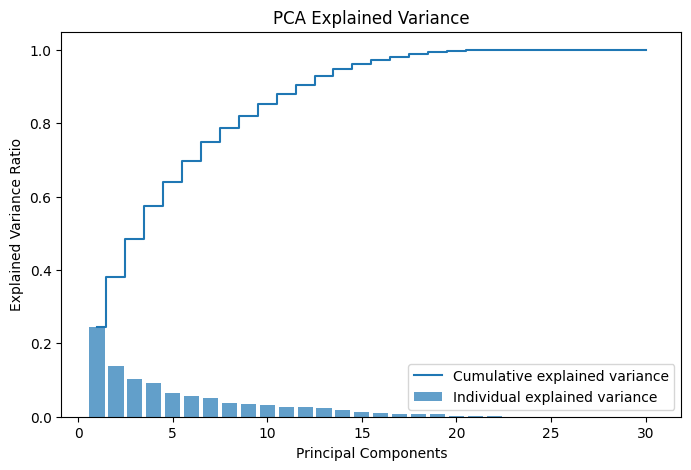

Number of components to retain 95% variance: 15
Shape before PCA: (303, 30)
Shape after PCA: (303, 15)
PCA data and model saved successfully!


In [6]:
# ===== Imports =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib
import os

# ===== Load data and preprocessor =====
df = pd.read_csv("data/heart_disease_clean.csv")
preprocessor = joblib.load("models/preprocessor.pkl")

# فصل Features و Target
X = df.drop("target", axis=1)
y = df["target"]

# ===== Apply preprocessing =====
X_pre = preprocessor.transform(X)

# ===== PCA analysis =====
pca = PCA(n_components=None, random_state=42)
pca.fit(X_pre)
explained = pca.explained_variance_ratio_

# ===== Plot explained variance =====
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label="Individual explained variance")
plt.step(range(1, len(explained)+1), np.cumsum(explained), where='mid', label="Cumulative explained variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.title("PCA Explained Variance")
plt.show()

# ===== Choosing number of components (95% variance) =====
n_comp = np.argmax(np.cumsum(explained) >= 0.95) + 1
print("Number of components to retain 95% variance:", n_comp)

# ===== Fit PCA with chosen components =====
pca = PCA(n_components=n_comp, random_state=42)
X_pca = pca.fit_transform(X_pre)

print("Shape before PCA:", X_pre.shape)
print("Shape after PCA:", X_pca.shape)

# ===== Save PCA results =====
os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

pd.DataFrame(X_pca).to_csv("data/heart_disease_pca.csv", index=False)
joblib.dump(pca, "models/pca.pkl")

print("PCA data and model saved successfully!")
